#### Import essential libraries to start work for Causal Inference

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/mac/Applications/Anaconda-data/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mac/Applications/Anaconda-data/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Reading dataset with the help of pandas library

In [2]:
data = pd.read_csv('train.csv')
data.head()

,physical_part_type,message_timestamp,weekday,shift,status,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
0,type1,01/09/2024 22:05,Sunday,Nachtschicht,OK,gAAAAABnRuZgg4Kol8URwnouW9Hv5RymnFqydE_5oyUU_3...,4606.469076,19.525688,374.198570,8858.706709,...,116.978698,25845.838372,NaN,210.307587,158.979496,35265.817888,217.244319,0.0,727.488871,28.207390
1,type2,01/09/2024 22:07,Sunday,Nachtschicht,OK,gAAAAABnRuZfvjtCL7qj_QEGC47fSq-n7brsZXoEV--vJ1...,5886.043819,17.540378,360.603884,8851.987083,...,133.967306,NaN,NaN,204.013170,157.362755,34114.280978,225.185946,0.0,741.645333,25.441928
2,type1,01/09/2024 22:07,Sunday,Nachtschicht,OK,gAAAAABnRuZfuXBrn_3FsgN6QXP6DQZPeVgP17o6yPbv4h...,4606.469076,20.445584,371.689206,8856.466834,...,155.401053,25845.838372,NaN,184.667093,NaN,35049.904717,223.404646,0.0,721.249812,25.441928
3,type1,01/09/2024 22:08,Sunday,Nachtschicht,OK,gAAAAABnRuZheONxFxB3r6dyfTZt1ehdUXm6a-9Opa35i4...,4606.469076,20.822377,372.461318,8854.226959,...,108.880369,25845.838372,NaN,195.774888,NaN,33682.454640,219.470943,0.0,716.725583,26.253564
4,type1,01/09/2024 22:08,Sunday,Nachtschicht,OK,gAAAAABnRuZiqnRUJiO7HqQmkkVmg-m21um0EcSExrMdud...,4606.469076,18.592800,373.371307,8851.987083,...,115.292611,25845.838372,NaN,174.577513,154.129274,34546.107319,240.178550,0.0,775.029771,21.271151


In [3]:
data.keys()

Index(['physical_part_type', 'message_timestamp', 'weekday', 'shift', 'status',
       'physical_part_id', 's6_sensor0_millimeter_step1',
       's8_sensor0_millimeter_step1', 's8_sensor1_millimeter_step1',
       's7_sensor0_newton_step1',
       ...
       's8_sensor119_millimeter_step1', 's0_sensor57_millimeter_step4',
       's2_sensor23_millimeter_step1', 's2_sensor24_millimeter_step1',
       's8_sensor120_ml_step1', 's7_sensor50_mikrometer_step1',
       's2_sensor25_millimeter_step1', 's8_sensor121_binaer_step1',
       's8_sensor122_millimeter_step1', 's3_sensor3_newtonmeter_step1'],
      dtype='object', length=376)

In [4]:
data.tail()

,physical_part_type,message_timestamp,weekday,shift,status,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
44813,type2,25/11/2024 0:50,Monday,Nachtschicht,OK,gAAAAABnRuZi5jnV3tyBhqZJ5wT0_a9MxZxEA7mGq_P1im...,5886.043819,19.411351,352.800037,8887.825088,...,173.488172,NaN,NaN,NaN,161.674064,31883.178213,NaN,0.0,813.631668,24.508053
44814,type2,25/11/2024 0:53,Monday,Nachtschicht,OK,gAAAAABnRuZf8bCkDO6ZE8b28qWk60DyoNY0wOltoORs0l...,5886.043819,17.181774,336.861440,8892.304838,...,170.805760,NaN,NaN,NaN,154.668187,32027.120327,NaN,0.0,805.203466,23.274894
44815,type1,25/11/2024 0:55,Monday,Nachtschicht,OK,gAAAAABnRuZfeD4r4QlWL4sQ9laHYGpg_mg1Mf1e_SeU_6...,4606.469076,17.298710,350.345824,8887.825088,...,174.535590,25845.838372,NaN,NaN,164.368631,32243.033498,NaN,0.0,778.897258,25.138601
44816,type2,25/11/2024 0:56,Monday,Nachtschicht,NOK,gAAAAABnRuZgYrpsqvS8pHeiYtpnflcQQb55_vGOikB2du...,5886.043819,19.541280,361.348420,8885.585212,...,172.313020,NaN,NaN,NaN,159.518409,33394.570408,NaN,0.0,728.546957,22.790479
44817,type1,25/11/2024 0:57,Monday,Nachtschicht,OK,gAAAAABnRuZhSNfaFFc3d1L4kRi9N6hwApIXcsq-71qAQ1...,4606.469076,18.429090,360.852063,8887.825088,...,171.214509,25845.838372,NaN,NaN,161.674064,33178.657238,NaN,0.0,746.607391,23.339133


#### Data pre processing methods

In [5]:
# Shape of our dataset
print("Number of rows is = ", data.shape[0], " \nNumber of columns is = " , data.shape[1]) 

Number of rows is =  44818  
Number of columns is =  376


In [6]:
data.dtypes

physical_part_type                object
message_timestamp                 object
weekday                           object
shift                             object
status                            object
                                  ...   
s7_sensor50_mikrometer_step1     float64
s2_sensor25_millimeter_step1     float64
s8_sensor121_binaer_step1        float64
s8_sensor122_millimeter_step1    float64
s3_sensor3_newtonmeter_step1     float64
Length: 376, dtype: object

In [7]:
data.describe()

,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,s9_sensor1_sekunden (zeit)_step1,s8_sensor2_millimeter_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
count,44022.000000,43531.000000,43531.000000,43389.000000,43498.000000,43733.000000,17253.000000,42866.000000,43396.000000,43554.000000,...,43554.000000,26492.000000,1.000000,42712.000000,44250.000000,43733.000000,42866.000000,43484.000000,43554.000000,43091.000000
mean,5109.904507,20.556290,388.387759,8865.170026,36.836991,31740.544502,-53.537243,18.819547,1056.103706,7.566427,...,166.453309,25843.001210,0.556207,187.826265,160.164095,33783.691037,219.963837,0.070978,757.423916,23.538795
std,628.300759,1.937856,35.189726,12.922544,0.052987,1641.460097,0.000000,1.847855,2.496241,0.918785,...,16.846206,63.369019,NaN,27.564517,9.358430,1202.982083,26.139442,2.181145,58.058404,1.846083
min,3326.894333,0.000000,0.000000,8820.628829,36.836737,20513.790470,-53.537243,-8.785189,1013.999755,0.000000,...,0.000000,24427.685375,0.556207,0.000000,0.000000,29652.075449,-74.220813,0.000000,0.000000,0.000000
25%,4606.469076,19.031959,364.933226,8856.466834,36.836737,31007.643687,-53.537243,18.167772,1056.249745,7.128812,...,161.123531,25845.838372,0.556207,169.949265,156.823842,32962.744067,218.506073,0.000000,718.695812,21.980190
50%,4606.469076,20.440387,387.627804,8865.426335,36.836737,31887.773312,-53.537243,19.195639,1056.249745,7.642628,...,169.068579,25845.838372,0.556207,190.961510,161.135150,33682.454640,222.068672,0.000000,754.378851,23.834538
75%,5886.043819,21.934567,413.162651,8874.385836,36.836737,32767.902936,-53.537243,19.916024,1056.249745,8.125676,...,176.068397,25845.838372,0.556207,207.345508,164.368631,34474.136262,225.557050,0.000000,791.156462,24.508053
max,5886.043819,35.483534,505.347310,8901.264339,47.887758,39808.939931,-53.537243,24.176841,1098.499734,11.568551,...,217.965113,25845.838372,0.556207,292.227576,497.417202,43254.605206,290.203378,67.095788,1092.893408,31.165923


In [8]:
# Info our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44818 entries, 0 to 44817
Columns: 376 entries, physical_part_type to s3_sensor3_newtonmeter_step1
dtypes: float64(370), object(6)
memory usage: 128.6+ MB


In [9]:
data['status'].value_counts()


status
OK     42544
NOK     2274
Name: count, dtype: int64

In [10]:
data['physical_part_type'].value_counts()
data['weekday'].value_counts()
data['shift'].value_counts()

shift
Spaetschicht    15607
Fruehschicht    15355
Nachtschicht    13856
Name: count, dtype: int64

#### Pie chart

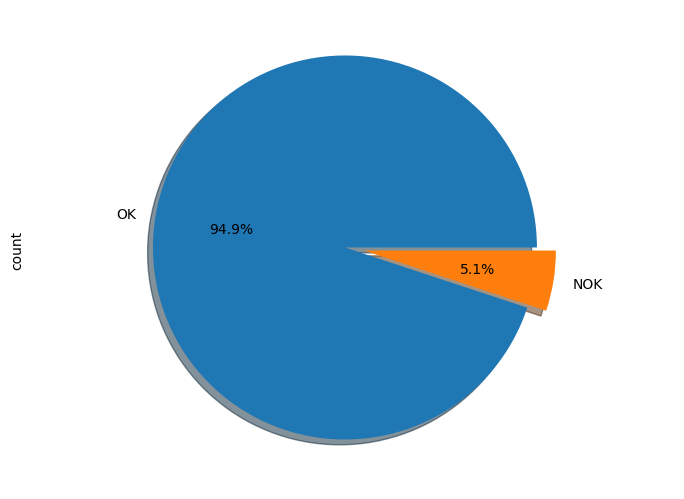

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data['status'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)

plt.show()

#### Visualization of data with histogram

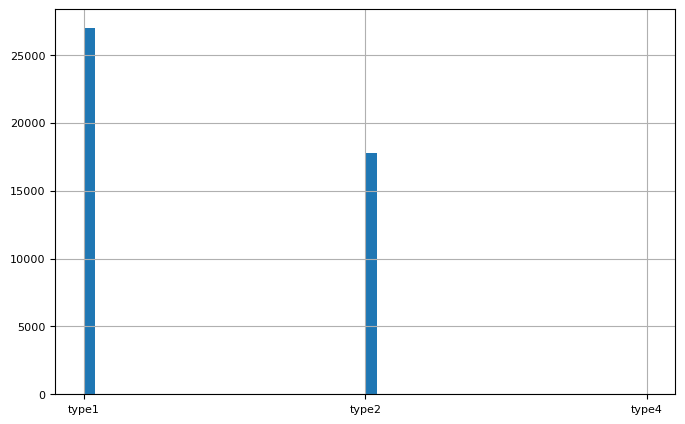

In [12]:
data['physical_part_type'].hist(figsize=(8, 5), bins=50, xlabelsize=8, ylabelsize=8);

#### Bar plot

<AxesSubplot:title={'center':'Shift Count by types'}, xlabel='shift'>

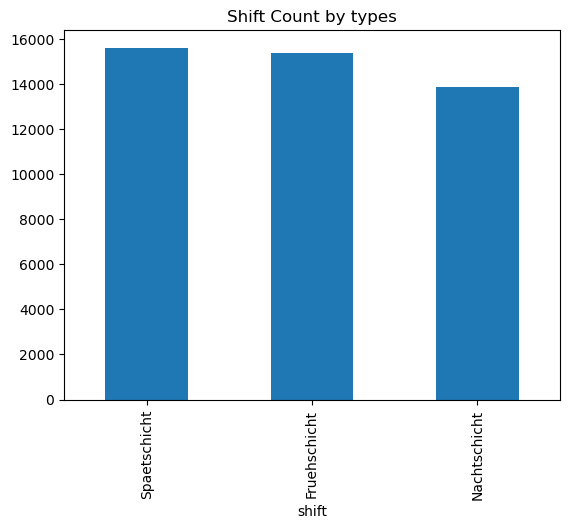

In [13]:
data['shift'].value_counts().plot.bar(title='Shift Count by types')


In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['physical_part_type'] = labelencoder.fit_transform(data['physical_part_type'])
data['message_timestamp'] = labelencoder.fit_transform(data['message_timestamp'])

data['physical_part_id'] = labelencoder.fit_transform(data['physical_part_id'])

data['weekday'] = labelencoder.fit_transform(data['weekday'])
data['shift'] = labelencoder.fit_transform(data['shift'])
data['status'] = labelencoder.fit_transform(data['status'])

In [15]:
x = data[['physical_part_type', 'weekday', 'shift', 'status']]

In [16]:
correlation = x.corr(method = 'pearson')
correlation

,physical_part_type,weekday,shift,status
physical_part_type,1.000000,-0.011879,-0.014311,0.015621
weekday,-0.011879,1.000000,0.051916,-0.014775
shift,-0.014311,0.051916,1.000000,0.016610
status,0.015621,-0.014775,0.016610,1.000000


#### Visualization of data with heatmap

<AxesSubplot:>

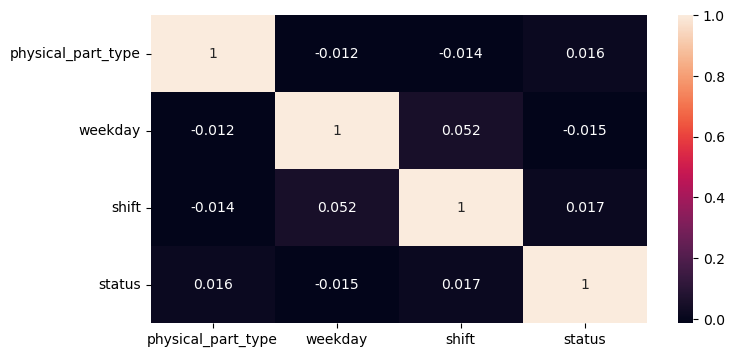

In [17]:
plt.figure(figsize=(8,4)) 
sns.heatmap(x.corr(), annot=True) 

#### Check the missing values in our dataset

In [18]:
pd.Series(data.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
physical_part_type,0
message_timestamp,0
weekday,0
shift,0
status,0
...,...
s7_sensor50_mikrometer_step1,1085
s2_sensor25_millimeter_step1,1952
s8_sensor121_binaer_step1,1334


In [19]:
df = data.fillna(0)

In [20]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
physical_part_type,0
message_timestamp,0
weekday,0
shift,0
status,0
...,...
s7_sensor50_mikrometer_step1,0
s2_sensor25_millimeter_step1,0
s8_sensor121_binaer_step1,0


In [21]:
data_val = df.drop('status', axis=1)


#### Split the data for training and testing

In [22]:
X = data_val.iloc[:,0:375].values

y = df.iloc[:,4].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [24]:
X_train.shape

(13445, 375)

In [25]:
X_test.shape

(31373, 375)

In [26]:
y_train.shape

(13445,)

In [27]:
y_test.shape

(31373,)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

#### Causal Inference

In [29]:
graph = """
digraph {
weekday;
message_timestamp;
physical_part_type;
shift;
status;
message_timestamp -> physical_part_type -> status;
weekday -> status;
weekday -> shift -> status;
weekday -> physical_part_type;
weekday -> status;
message_timestamp->status;
}
"""

In [30]:
import dowhy
from dowhy import CausalModel

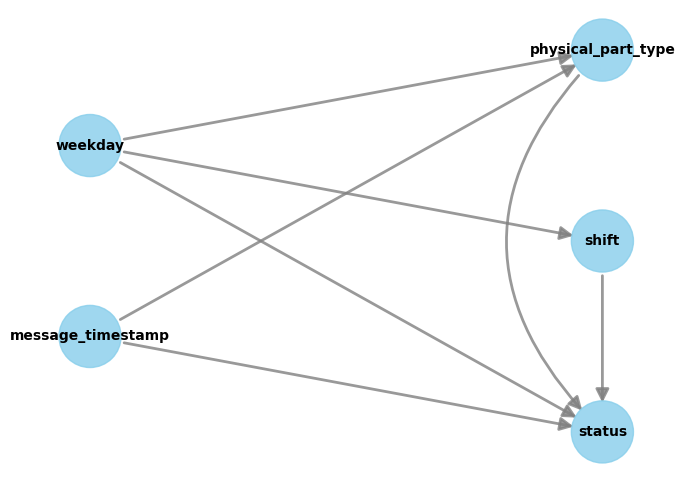

In [31]:
causal_inference = dowhy.CausalModel(data=data,
                          graph=graph.replace("\n", " "),
                          treatment="physical_part_type",
                          outcome="status")
causal_inference.view_model()

In [32]:
res = causal_inference.identify_effect()
print(res)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                              
─────────────────────(E[status|weekday,messageₜᵢₘₑₛₜₐₘₚ])
d[physical_part_type]                                    
Estimand assumption 1, Unconfoundedness: If U→{physical_part_type} and U→status then P(status|physical_part_type,weekday,message_timestamp,U) = P(status|physical_part_type,weekday,message_timestamp)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [33]:
causal_inference_estimate= causal_inference.estimate_effect(
 identified_estimand=res,
 method_name='backdoor.linear_regression',
 confidence_intervals=True,
  test_significance=True
)

print(f'Estimate of causal effect: {causal_inference_estimate}')

Estimate of causal effect: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                              
─────────────────────(E[status|weekday,messageₜᵢₘₑₛₜₐₘₚ])
d[physical_part_type]                                    
Estimand assumption 1, Unconfoundedness: If U→{physical_part_type} and U→status then P(status|physical_part_type,weekday,message_timestamp,U) = P(status|physical_part_type,weekday,message_timestamp)

## Realized estimand
b: status~physical_part_type+weekday+message_timestamp+physical_part_type*shift
Target units: 

## Estimate
Mean value: 0.008252900631602555
p-value: [0.68476001]
95.0% confidence interval: (0.00400865731428246, 0.012060687119229585)
### Conditional Estimates
__categorical__shift
(-0.001, 1.0]    0.004508
(1.0, 2.0]       0.015263
dtype: float64


#### Apply KNN on train and test data

In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
# Create KNN instance
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [36]:
predict = knn.predict(X)
predict

array([1, 0, 1, ..., 0, 0, 0])

In [37]:
dataset = df[['physical_part_type', 'status']]

In [38]:
dataset['predict'] = predict

In [39]:
dataset.head()

,physical_part_type,status,predict
0,0,1,1
1,1,1,0
2,0,1,1
3,0,1,1
4,0,1,1


In [40]:
dataset.to_csv('predicted_data.csv')

## Evaluate the model

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [42]:
print("Accuracy:",metrics.accuracy_score(y, predict))


Accuracy: 0.9617564371457896


In [43]:
print("Accuracy:",metrics.accuracy_score(y, predict))
print("Precision:",metrics.precision_score(y, predict, average = 'weighted'))
print("Recall:",metrics.recall_score(y, predict, average = 'weighted'))
print("F1-score:",metrics.f1_score(y, predict, average = 'weighted'))

Accuracy: 0.9617564371457896
Precision: 0.9781931138589582
Recall: 0.9617564371457896
F1-score: 0.9665972404153785


In [44]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, predict))

0.038243562854210364


In [45]:
print(confusion_matrix(y, predict))

[[ 2274     0]
 [ 1714 40830]]


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<function matplotlib.pyplot.show(close=None, block=None)>

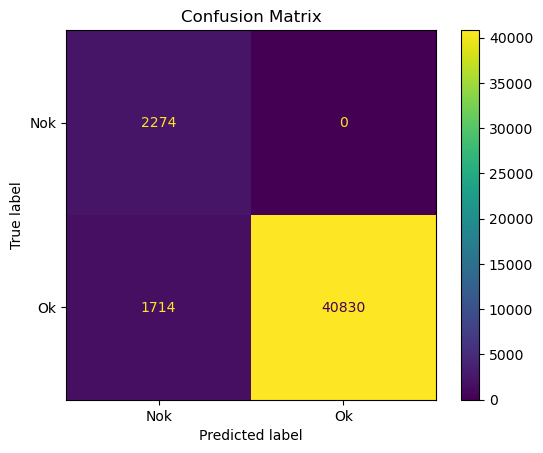

In [47]:
y_pred = knn.predict(X)
cm = confusion_matrix(y,predict)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Nok','Ok'])
cmd.plot(values_format='d')
plt.title('Confusion Matrix')
plt.show

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      2274
           1       1.00      0.96      0.98     42544

    accuracy                           0.96     44818
   macro avg       0.79      0.98      0.85     44818
weighted avg       0.98      0.96      0.97     44818

